In [1]:
!pip install imblearn

In [2]:
# doing the necessary imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# reading the data file
data=pd.read_csv(r'D:\lubi\ICT\TCS_INTERN\salarydata.csv')

In [4]:

#for ignoring warnings 

import warnings
warnings.filterwarnings("ignore")
     

## Descriptive Analysis

In [5]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [8]:
data.shape

(32561, 14)

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [12]:
z=data

In [13]:
data["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
data.isin(['?']).sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [15]:

data =data.replace('?', np.nan)

In [16]:
data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [17]:
data.nunique()

age                73
workclass           8
education          16
education-num      16
marital-status      7
occupation         14
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     41
salary              2
dtype: int64

In [18]:
df=data

## Finding Outliers

<AxesSubplot:xlabel='hours-per-week'>

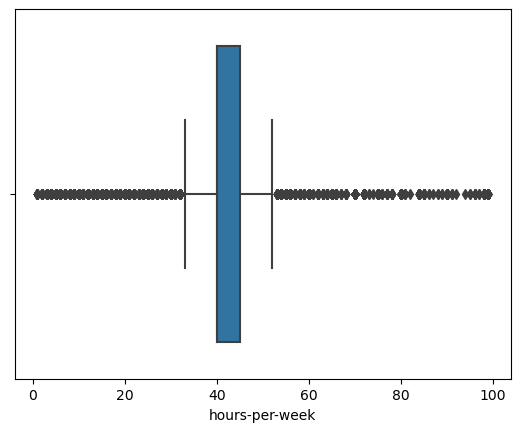

In [19]:
sns.boxplot(data["hours-per-week"])
#plt.show()

<AxesSubplot:xlabel='age'>

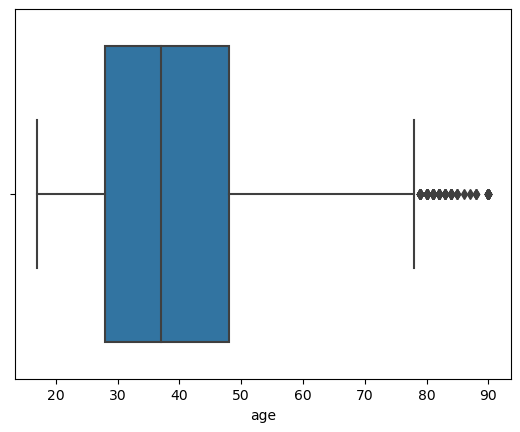

In [20]:

sns.boxplot(data["age"])
#plt.show()

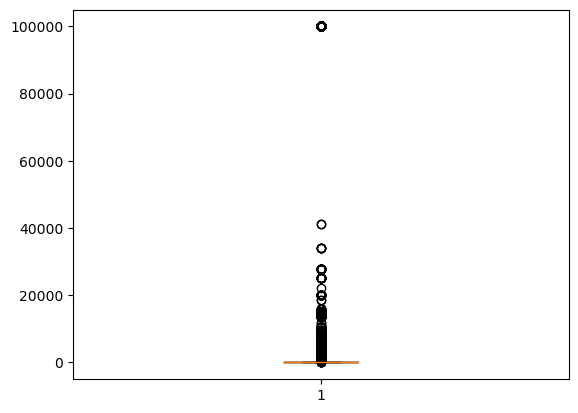

In [21]:
plt.boxplot(data["capital-gain"])
plt.show()

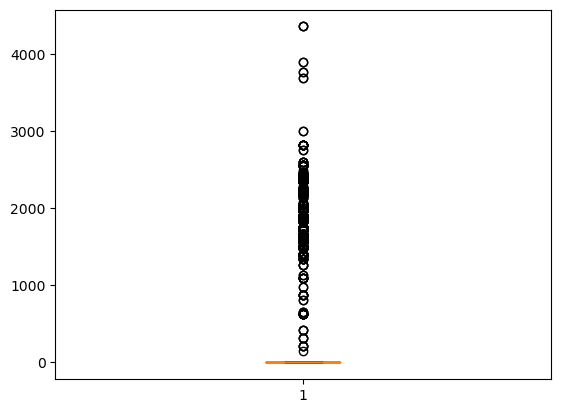

In [22]:
plt.boxplot(data["capital-loss"])
plt.show()

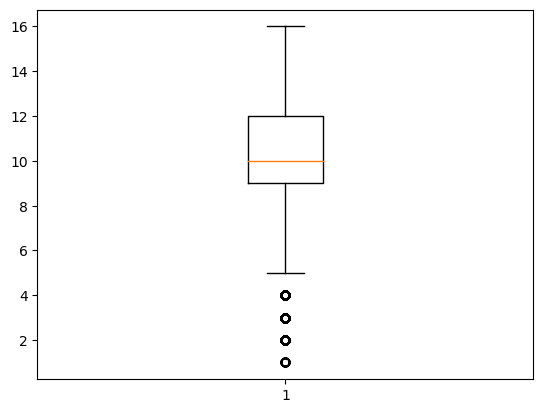

In [23]:
plt.boxplot(df["education-num"])
plt.show()

In [24]:
# Making sure that the data doesn't contain unecessary spaces
data=data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [25]:
data.shape

(32561, 14)

In [26]:
data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [27]:
data.salary.unique()

array(['<=50K', '>50K'], dtype=object)

In [28]:
data["salary"].replace(to_replace=['<=50K', '>50K'], value=[0, 1],inplace=True)

In [29]:
df=data

## Exploratory Data Analysis

In [30]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

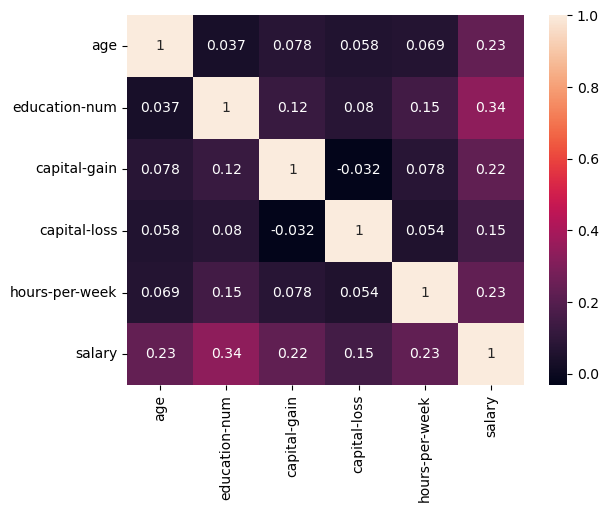

In [31]:
corr=df.corr()
sns.heatmap(corr,annot= True)

In [32]:
data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

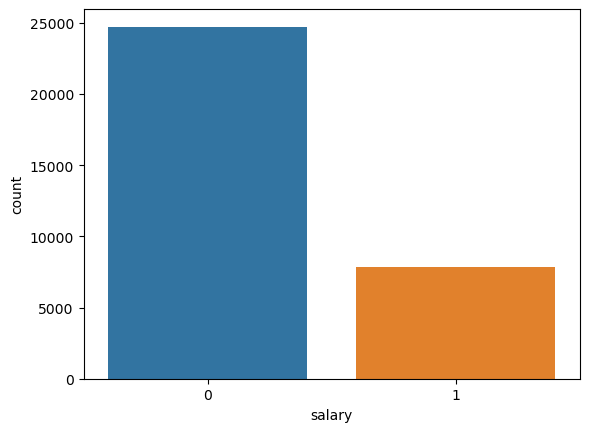

In [33]:

#Countplot showing the number of people of both Salary categories
sns.countplot('salary',data=df)
plt.show()
     

<AxesSubplot:xlabel='age', ylabel='Count'>

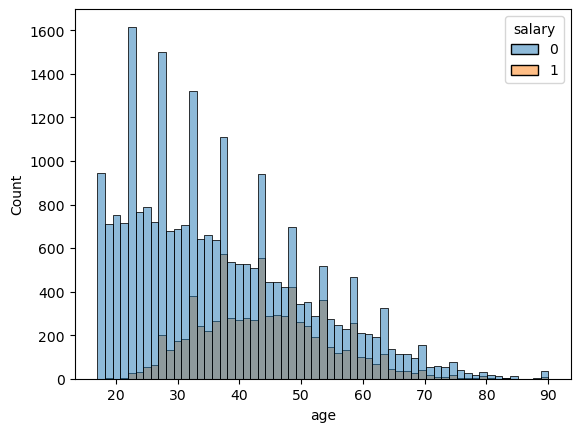

In [34]:

# Histogram showing Age and Salary
sns.histplot(df, x='age', hue = 'salary',)

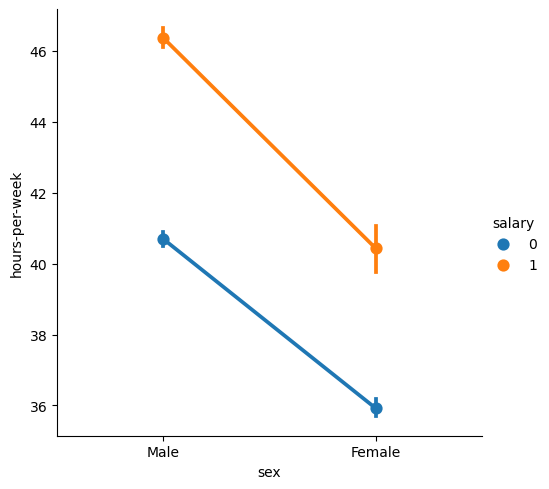

In [35]:
#Point plot between Sex, hours per week and Income of the person
sns.catplot(x="sex", y="hours-per-week", hue="salary", kind="point", data=df)

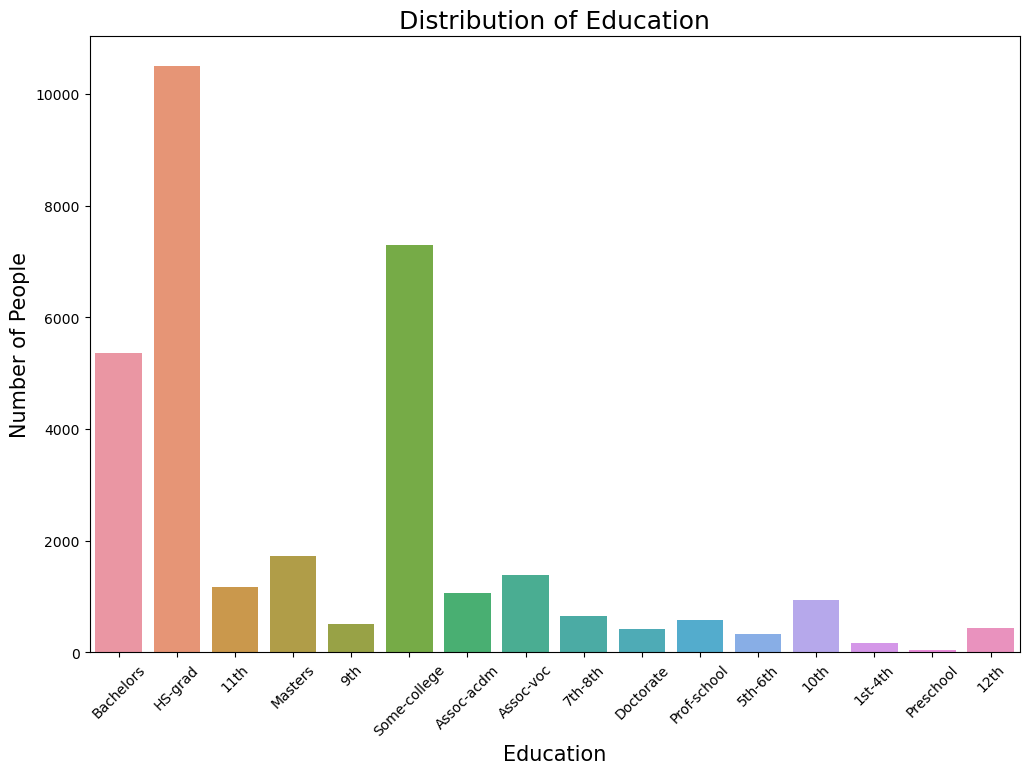

In [36]:
# Distribution of Education

plt.figure(figsize=(12,8))
sns.countplot(df["education"])
plt.title("Distribution of Education",size=18)
plt.xlabel("Education",size=15)
plt.ylabel("Number of People",size=15)
plt.xticks(rotation = '45')
plt.show()

# Data Modeling and Feature Engineering

In [37]:
df=data

In [38]:
df.isna().sum()


age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

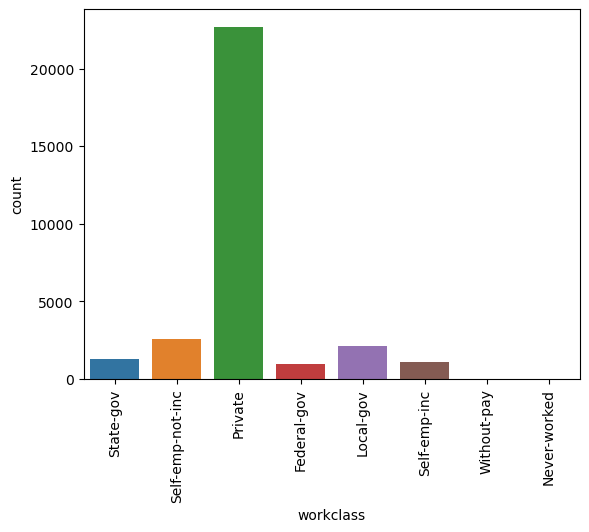

In [39]:
sns.countplot(df["workclass"])
plt.xticks(rotation = '90')
plt.show()

In [40]:
work=df["workclass"].mode()[0]
df["workclass"].fillna(work,inplace=True)

In [41]:
occu_mode=df["occupation"].mode()[0]
df["occupation"].fillna(occu_mode,inplace=True)


In [42]:
native_mode=df["native-country"].mode()[0]
df["native-country"].fillna(native_mode,inplace=True)


In [43]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Checking duplicated raws

In [44]:
duplicate_Row = df[df.duplicated()]

In [45]:
duplicate_Row 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
352,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
391,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,0
563,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,0
570,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0
673,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32503,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
32512,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,0
32527,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


In [46]:
a=duplicate_Row.index

In [47]:
a

Int64Index([  352,   391,   563,   570,   673,   693,   864,   944,  1042,
             1050,
            ...
            32455, 32480, 32482, 32484, 32485, 32503, 32512, 32527, 32557,
            32559],
           dtype='int64', length=3591)

In [48]:
df.drop(a,axis=0,inplace=True)

In [49]:
salary = df['salary'].value_counts(normalize=True)
round(salary * 100, 2).astype('str') + ' %'

0    75.22 %
1    24.78 %
Name: salary, dtype: object

In [50]:
#If we take 'native-country'we can see that,most of the people are from usa.so we take make a change like people from either usa or other.

In [51]:
print('\n --Value Counts-- \n')
print(df['native-country'].value_counts())

print('\n-----------------------------------')
print('{}% people belong from united states.'
      .format(round(len(df[df['native-country']=='United-States'])/28970*100,2)))

print('{}% people belong from other country.'
      .format(round(len(df[df['native-country']!='United-States'])/28970*100,2)))


 --Value Counts-- 

United-States                 26175
Mexico                          633
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece 

In [52]:
countries = df['native-country'].unique()[1:]
df['native-country'] = df['native-country'].replace(to_replace=countries, value='Other')

In [53]:
df['native-country'].unique()

array(['United-States', 'Other'], dtype=object)

In [54]:

df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
32555,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [55]:
duplicate_Row = df[df.duplicated()]

In [56]:
a=duplicate_Row.index

In [57]:
a

Int64Index([ 6877,  8152, 13174, 13832, 14356, 20339, 21065, 22775, 23315,
            25826, 26606, 26844, 27332, 27887, 27955, 28871, 29353, 31207,
            31376, 31907],
           dtype='int64')

In [58]:
df.drop(a,axis=0,inplace=True)
# dropping duplicate values in the dataset.

### skewness of data

In [59]:

df.skew()


age                0.540658
education-num     -0.350421
capital-gain      11.304079
capital-loss       4.309204
hours-per-week     0.240221
salary             1.168329
dtype: float64

In [60]:
df["capital-gain"]=df["capital-gain"].apply(lambda x: (-1)*np.power(-x,1./3) if x<0 else np.power(x,1./3))
df["capital-loss"]=df["capital-loss"].apply(lambda x: (-1)*np.power(-x,1./3) if x<0 else np.power(x,1./3))
df.skew()

age               0.540658
education-num    -0.350421
capital-gain      3.839826
capital-loss      4.062827
hours-per-week    0.240221
salary            1.168329
dtype: float64

In [61]:
features=df[["age","education-num","capital-gain","capital-loss","hours-per-week"]]
features

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,12.954476,0.0,40
1,50,13,0.000000,0.0,13
2,38,9,0.000000,0.0,40
3,53,7,0.000000,0.0,40
4,28,13,0.000000,0.0,40
...,...,...,...,...,...
32554,53,14,0.000000,0.0,40
32555,22,10,0.000000,0.0,40
32556,27,12,0.000000,0.0,38
32558,58,9,0.000000,0.0,40


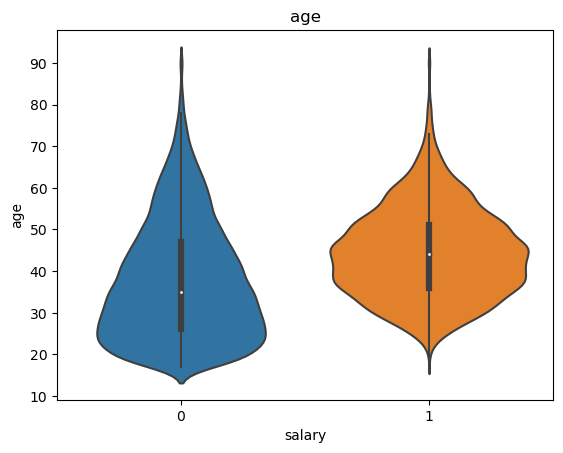

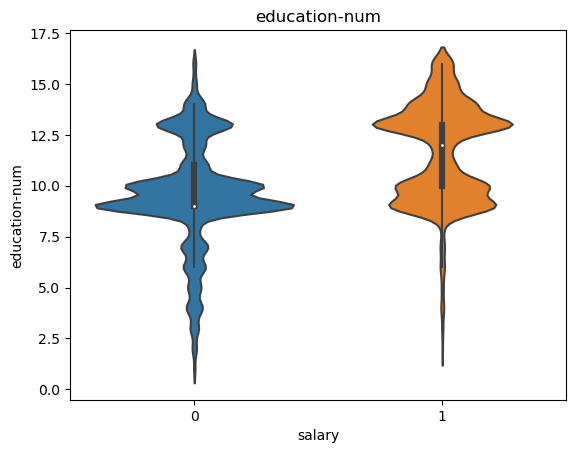

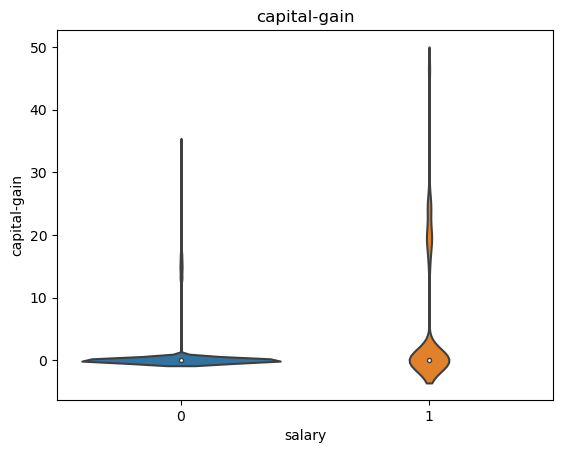

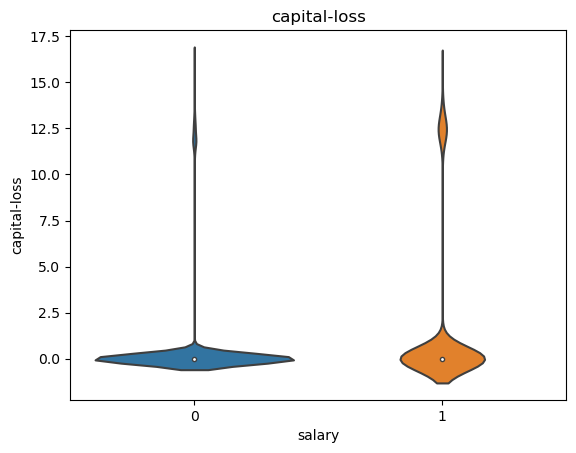

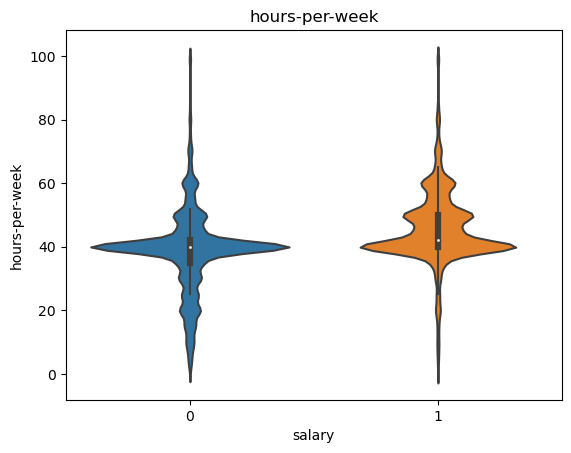

In [62]:
for i in features:
    sns.violinplot(x="salary",y=i,data=df)
    plt.title(i)
    plt.show()

In [63]:
df["capital-gain"].nunique()



119

In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28950 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28950 non-null  int64  
 1   workclass       28950 non-null  object 
 2   education       28950 non-null  object 
 3   education-num   28950 non-null  int64  
 4   marital-status  28950 non-null  object 
 5   occupation      28950 non-null  object 
 6   relationship    28950 non-null  object 
 7   race            28950 non-null  object 
 8   sex             28950 non-null  object 
 9   capital-gain    28950 non-null  float64
 10  capital-loss    28950 non-null  float64
 11  hours-per-week  28950 non-null  int64  
 12  native-country  28950 non-null  object 
 13  salary          28950 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 3.3+ MB


In [65]:
df["marital-status"].value_counts()

Married-civ-spouse       13177
Never-married             9104
Divorced                  4232
Separated                 1014
Widowed                    982
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [66]:
#### We can change marital-status to two like married or not-married.
df=df.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})
df["marital-status"].value_counts()

not married    15332
married        13618
Name: marital-status, dtype: int64

In [67]:
edu=df['education'].unique()
for i in edu:
    print("{}, the Education Number is {}".
          format(i,df[df['education'] == i]['education-num'].unique()))

Bachelors, the Education Number is [13]
HS-grad, the Education Number is [9]
11th, the Education Number is [7]
Masters, the Education Number is [14]
9th, the Education Number is [5]
Some-college, the Education Number is [10]
Assoc-acdm, the Education Number is [12]
Assoc-voc, the Education Number is [11]
7th-8th, the Education Number is [4]
Doctorate, the Education Number is [16]
Prof-school, the Education Number is [15]
5th-6th, the Education Number is [3]
10th, the Education Number is [6]
1st-4th, the Education Number is [2]
Preschool, the Education Number is [1]
12th, the Education Number is [8]


In [68]:
df.drop(["education-num"],axis=1,inplace =True)

In [69]:
 df.drop(["capital-gain","capital-loss"],axis=1,inplace=True)
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [70]:
df['sex'] = df.sex.replace({"Male": 0, "Female": 1})

In [71]:
df


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,not married,Adm-clerical,Not-in-family,White,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,married,Exec-managerial,Husband,White,0,13,United-States,0
2,38,Private,HS-grad,not married,Handlers-cleaners,Not-in-family,White,0,40,United-States,0
3,53,Private,11th,married,Handlers-cleaners,Husband,Black,0,40,United-States,0
4,28,Private,Bachelors,married,Prof-specialty,Wife,Black,1,40,Other,0
...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,married,Exec-managerial,Husband,White,0,40,United-States,1
32555,22,Private,Some-college,not married,Protective-serv,Not-in-family,White,0,40,United-States,0
32556,27,Private,Assoc-acdm,married,Tech-support,Wife,White,1,38,United-States,0
32558,58,Private,HS-grad,not married,Adm-clerical,Unmarried,White,1,40,United-States,0


In [72]:

df["native-country"].unique()

array(['United-States', 'Other'], dtype=object)

In [73]:
df["native-country"].replace(to_replace=['United-States', 'Other'], value=[0, 1],inplace=True)
df["marital-status"].replace(to_replace=['not married', 'married'], value=[0, 1],inplace=True)

In [74]:
duplicate_Row = df[df.duplicated()]
a=duplicate_Row.index

In [75]:
df.drop(a,axis=0,inplace=True)

In [76]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,0,Adm-clerical,Not-in-family,White,0,40,0,0
1,50,Self-emp-not-inc,Bachelors,1,Exec-managerial,Husband,White,0,13,0,0
2,38,Private,HS-grad,0,Handlers-cleaners,Not-in-family,White,0,40,0,0
3,53,Private,11th,1,Handlers-cleaners,Husband,Black,0,40,0,0
4,28,Private,Bachelors,1,Prof-specialty,Wife,Black,1,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,Masters,0,Tech-support,Not-in-family,Asian-Pac-Islander,0,11,1,0
32554,53,Private,Masters,1,Exec-managerial,Husband,White,0,40,0,1
32555,22,Private,Some-college,0,Protective-serv,Not-in-family,White,0,40,0,0
32556,27,Private,Assoc-acdm,1,Tech-support,Wife,White,1,38,0,0


In [77]:
df=pd.get_dummies(df)

In [78]:
df

,age,marital-status,sex,hours-per-week,native-country,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,0,0,40,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,0,0,40,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,53,1,0,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,1,1,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,0,0,11,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
32554,53,1,0,40,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
32555,22,0,0,40,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
32556,27,1,1,38,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [79]:
sal_df=df

### Dependent- Independent splitting

In [80]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['age','hours-per-week']

scaler = MinMaxScaler()
sal_df[numerical] = scaler.fit_transform(sal_df[numerical])
sal_df

,age,marital-status,sex,hours-per-week,native-country,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.301370,0,0,0.397959,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.452055,1,0,0.122449,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.287671,0,0,0.397959,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0.493151,1,0,0.397959,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,1,1,0.397959,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,0.205479,0,0,0.102041,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
32554,0.493151,1,0,0.397959,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
32555,0.068493,0,0,0.397959,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
32556,0.136986,1,1,0.377551,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [81]:
X=df.drop("salary",axis=1)
y=df["salary"]

In [82]:
X

,age,marital-status,sex,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.301370,0,0,0.397959,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.452055,1,0,0.122449,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.287671,0,0,0.397959,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.493151,1,0,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,1,1,0.397959,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,0.205479,0,0,0.102041,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
32554,0.493151,1,0,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
32555,0.068493,0,0,0.397959,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
32556,0.136986,1,1,0.377551,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [83]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32553    0
32554    1
32555    0
32556    0
32560    1
Name: salary, Length: 27693, dtype: int64

#### Test Train splitting

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.25,
                                              random_state=123)

In [85]:
X_train

,age,marital-status,sex,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
1241,0.520548,0,1,0.244898,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2514,0.164384,1,0,0.448980,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30897,0.013699,0,1,0.112245,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
30627,0.726027,1,0,0.316327,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
17445,0.369863,1,0,0.397959,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075,0.465753,0,1,0.397959,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
24715,0.027397,0,1,0.295918,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
19872,0.465753,1,1,0.397959,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
17509,0.260274,0,0,0.561224,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [87]:
y_pred = lr.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [88]:
confusion_matrix(y_test,y_pred)

array([[4840,  408],
       [ 815,  861]], dtype=int64)

In [89]:
print("Logistic Accuracy",accuracy_score(y_test,y_pred)*100)
print("Logistic Precision",precision_score(y_test,y_pred)*100)
print("Logistic Recall",recall_score(y_test,y_pred)*100)
print("Logistic F1_Score",f1_score(y_test,y_pred)*100)

Logistic Accuracy 82.3367995378394
Logistic Precision 67.84869976359337
Logistic Recall 51.372315035799524
Logistic F1_Score 58.47198641765705


Since our dataset is a unbalanced data set ie, real job is 70% and fraud job is 20%. we are using oversampling to balance the dataset.

Here we are using SMOTE oversampling technique to balance the dataset because it is the most commonly used method also It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances

In [90]:
X_train

,age,marital-status,sex,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
1241,0.520548,0,1,0.244898,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2514,0.164384,1,0,0.448980,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30897,0.013699,0,1,0.112245,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
30627,0.726027,1,0,0.316327,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
17445,0.369863,1,0,0.397959,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075,0.465753,0,1,0.397959,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
24715,0.027397,0,1,0.295918,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
19872,0.465753,1,1,0.397959,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
17509,0.260274,0,0,0.561224,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [91]:
X_test

,age,marital-status,sex,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
31589,0.123288,1,0,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2221,0.547945,0,1,0.346939,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2395,0.109589,0,0,0.397959,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
15732,0.287671,0,1,0.193878,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10406,0.191781,1,0,0.500000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,0.589041,0,1,0.142857,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
28984,0.095890,0,0,0.397959,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
32039,0.095890,0,0,0.397959,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
22776,0.123288,0,1,0.448980,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(X_train, y_train)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
lr=LogisticRegression()

In [95]:
lr.fit(x_smote,y_smote)

LogisticRegression()

In [96]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [97]:
confusion_matrix(y_test,y_pred)

array([[4199, 1049],
       [ 355, 1321]], dtype=int64)

In [98]:
print("Logistic Accuracy",accuracy_score(y_test,y_pred)*100)
print("Logistic Precision",precision_score(y_test,y_pred)*100)
print("Logistic Recall",recall_score(y_test,y_pred)*100)
print("Logistic F1_Score",f1_score(y_test,y_pred)*100)

Logistic Accuracy 79.72270363951473
Logistic Precision 55.73839662447257
Logistic Recall 78.81861575178998
Logistic F1_Score 65.29906080079091


## KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_smote,y_smote)
y_pred_knn = knn.predict(X_test)
y_pred_knn


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [100]:
confusion_matrix(y_test,y_pred_knn)

array([[3920, 1328],
       [ 313, 1363]], dtype=int64)

In [101]:
print("KNN Accuracy",accuracy_score(y_test,y_pred_knn)*100)
print("KNN Precision",precision_score(y_test,y_pred_knn)*100)
print("KNN Recall",recall_score(y_test,y_pred_knn)*100)
print("KNN F1_Score",f1_score(y_test,y_pred_knn)*100)

KNN Accuracy 76.29982668977469
KNN Precision 50.65031586770717
KNN Recall 81.32458233890215
KNN F1_Score 62.42271582321961


## Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier
dt_reg = DecisionTreeClassifier()
dt_reg.fit(x_smote,y_smote)
y_pred_dt = dt_reg.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
confusion_matrix(y_test,y_pred_dt)

array([[4283,  965],
       [ 826,  850]], dtype=int64)

In [104]:
print("DT Accuracy",accuracy_score(y_test,y_pred_dt)*100)
print("DT Precision",precision_score(y_test,y_pred_dt)*100)
print("DT Recall",recall_score(y_test,y_pred_dt)*100)
print("DT F1_Score",f1_score(y_test,y_pred_dt)*100)

DT Accuracy 74.13344887348353
DT Precision 46.83195592286501
DT Recall 50.71599045346063
DT F1_Score 48.696648524778006


## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier()

rf_reg.fit(x_smote,y_smote)

y_pred_rf = rf_reg.predict(X_test)

In [106]:
y_pred_rf 

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [107]:
confusion_matrix(y_test,y_pred_rf)

array([[4348,  900],
       [ 644, 1032]], dtype=int64)

In [108]:
print("RF Accuracy",accuracy_score(y_test,y_pred_rf)*100)
print("RF Precision",precision_score(y_test,y_pred_rf)*100)
print("RF Recall",recall_score(y_test,y_pred_rf)*100)
print("RF F1_Score",f1_score(y_test,y_pred_rf)*100)

RF Accuracy 77.7007510109763
RF Precision 53.41614906832298
RF Recall 61.575178997613364
RF F1_Score 57.206208425720625


## GradientBoosting Classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gbtc = GradientBoostingClassifier(random_state=0)
gbtc.fit(x_smote,y_smote)





GradientBoostingClassifier(random_state=0)

In [110]:
y_pred_gbtc = gbtc.predict(X_test)
y_pred_gbtc

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [111]:
confusion_matrix(y_test,y_pred_gbtc)

array([[4108, 1140],
       [ 315, 1361]], dtype=int64)

In [112]:

print("GBC Accuracy",accuracy_score(y_test,y_pred_gbtc)*100)
print("GBC Precision",precision_score(y_test,y_pred_gbtc)*100)
print("GBC Recall",recall_score(y_test,y_pred_gbtc)*100)
print("GBC F1_Score",f1_score(y_test,y_pred_gbtc)*100)

GBC Accuracy 78.98613518197574
GBC Precision 54.41823270691724
GBC Recall 81.2052505966587
GBC F1_Score 65.16638735934882


## Support Vector Machine

In [113]:

from sklearn.svm import SVC
svm_ = SVC(kernel="linear")
svm_.fit(x_smote,y_smote)
y_pred_svm = svm_.predict(X_test)
y_pred_svm 



array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [114]:
confusion_matrix(y_test,y_pred_svm)

print(accuracy_score(y_test,y_pred_svm)*100)
print(precision_score(y_test,y_pred_svm)*100)
print(recall_score(y_test,y_pred_svm)*100)
print(f1_score(y_test,y_pred_svm)*100)

78.53841709994222
53.915910964550704
78.04295942720763
63.77376889322283


## XGBoost Classifier

In [115]:
 !pip install xgboost

In [116]:

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(x_smote, y_smote)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

confusion_matrix(y_test,y_pred_xgb)


array([[4556,  692],
       [ 560, 1116]], dtype=int64)

In [117]:

print("XGBC Accuracy",accuracy_score(y_test,y_pred_xgb)*100)
print("XGBC Precision",precision_score(y_test,y_pred_xgb)*100)
print("XGBC Recall",recall_score(y_test,y_pred_xgb)*100)
print("XGBC F1_Score",f1_score(y_test,y_pred_xgb)*100)

XGBC Accuracy 81.91796649335645
XGBC Precision 61.72566371681416
XGBC Recall 66.5871121718377
XGBC F1_Score 64.06429391504018


## Taking X and y

In [118]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(X, y)
x_smote

,age,marital-status,sex,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.301370,0,0,0.397959,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.452055,1,0,0.122449,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.287671,0,0,0.397959,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.493151,1,0,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,1,1,0.397959,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42057,0.334274,1,0,0.418468,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
42058,0.285641,1,0,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42059,0.428149,0,1,0.484701,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
42060,0.241060,1,0,0.484760,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [119]:
y_smote

0        0
1        0
2        0
3        0
4        0
        ..
42057    1
42058    1
42059    1
42060    1
42061    1
Name: salary, Length: 42062, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,
                                              test_size=0.25,
                                              random_state=123)

## Logistic Regression

In [121]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [122]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[4118, 1104],
       [ 698, 4596]], dtype=int64)

In [123]:
print("LG Accuracy",accuracy_score(y_test,y_pred)*100)
print("LG Precision",precision_score(y_test,y_pred)*100)
print("LG Recall",recall_score(y_test,y_pred)*100)
print("LG F1_Score",f1_score(y_test,y_pred)*100)

LG Accuracy 82.86420692278433
LG Precision 80.63157894736842
LG Recall 86.81526256139026
LG F1_Score 83.60924140440241


## KNN

In [124]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
confusion_matrix(y_test,y_pred_knn)


array([[3905, 1317],
       [ 564, 4730]], dtype=int64)

In [125]:

print("KNN Accuracy",accuracy_score(y_test,y_pred_knn)*100)
print("KNN Precision",precision_score(y_test,y_pred_knn)*100)
print("KNN Recall",recall_score(y_test,y_pred_knn)*100)
print("KNN F1_Score",f1_score(y_test,y_pred_knn)*100)

KNN Accuracy 82.11297071129707
KNN Precision 78.22060525880602
KNN Recall 89.3464299206649
KNN F1_Score 83.4141610087294


## Decision tree

In [126]:

from sklearn.tree import DecisionTreeClassifier
dt_reg = DecisionTreeClassifier()
dt_reg.fit(X_train,y_train)
y_pred_dt = dt_reg.predict(X_test)
confusion_matrix(y_test,y_pred_dt)


array([[4221, 1001],
       [1123, 4171]], dtype=int64)

In [127]:

print("DT Accuracy",accuracy_score(y_test,y_pred_dt)*100)
print("DT Precision",precision_score(y_test,y_pred_dt)*100)
print("DT Recall",recall_score(y_test,y_pred_dt)*100)
print("DT F1_Score",f1_score(y_test,y_pred_dt)*100)

DT Accuracy 79.8022061620388
DT Precision 80.64578499613302
DT Recall 78.78730638458632
DT F1_Score 79.70571373972865


## GradientBoost


In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbtc = GradientBoostingClassifier(random_state=0)
gbtc.fit(X_train,y_train)
y_pred_gbtc = gbtc.predict(X_test)
confusion_matrix(y_test,y_pred_gbtc)


array([[4038, 1184],
       [ 627, 4667]], dtype=int64)

In [129]:

print("GBC Accuracy",accuracy_score(y_test,y_pred_gbtc)*100)
print("GBC Precision",precision_score(y_test,y_pred_gbtc)*100)
print("GBC Recall",recall_score(y_test,y_pred_gbtc)*100)
print("GBC F1_Score",f1_score(y_test,y_pred_gbtc)*100)

GBC Accuracy 82.77862305058957
GBC Precision 79.76414288155871
GBC Recall 88.1564034756328
GBC F1_Score 83.75056078959174


## Spport Vector Machine

In [130]:

from sklearn.svm import SVC
svm_ = SVC(kernel="linear")
svm_.fit(X_train,y_train)
y_pred_svm = svm_.predict(X_test)
confusion_matrix(y_test,y_pred_svm)


array([[4110, 1112],
       [ 815, 4479]], dtype=int64)

In [131]:

print(accuracy_score(y_test,y_pred_svm)*100)
print(precision_score(y_test,y_pred_svm)*100)
print(recall_score(y_test,y_pred_svm)*100)
print(f1_score(y_test,y_pred_svm)*100)

81.67554203119056
80.11089250581291
84.60521344918776
82.29673863114377


## Random Forest

In [132]:

from sklearn.ensemble import RandomForestClassifier

rf_reg1 = RandomForestClassifier()

rf_reg1.fit(X_train,y_train)

y_pred_rf = rf_reg1.predict(X_test)
y_pred_rf 



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
confusion_matrix(y_test,y_pred_rf)



array([[4291,  931],
       [ 758, 4536]], dtype=int64)

In [134]:
print("RF Accuracy",accuracy_score(y_test,y_pred_rf)*100)
print("RF Precision",precision_score(y_test,y_pred_rf)*100)
print("RF Recall",recall_score(y_test,y_pred_rf)*100)
print("RF F1_Score",f1_score(y_test,y_pred_rf)*100)

RF Accuracy 83.9387599847851
RF Precision 82.97055057618438
RF Recall 85.68190404231206
RF F1_Score 84.30443267354335


## XGBoost

In [135]:

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
confusion_matrix(y_test,y_pred_xgb)


array([[4544,  678],
       [ 565, 4729]], dtype=int64)

In [136]:

print("XGBC Accuracy",accuracy_score(y_test,y_pred_xgb)*100)
print("XGBC Precision",precision_score(y_test,y_pred_xgb)*100)
print("XGBC Recall",recall_score(y_test,y_pred_xgb)*100)
print("XGBC F1_Score",f1_score(y_test,y_pred_xgb)*100)

XGBC Accuracy 88.17991631799164
XGBC Precision 87.46069909376733
XGBC Recall 89.3275406120136
XGBC F1_Score 88.38426315297636


### Sample method to increase minority to balance majority class


In [137]:
clss=df
class_0=clss[clss['salary']==0]
class_1=clss[clss['salary']==1]
class_0.shape



(21031, 55)

In [138]:
class_1.shape

(6662, 55)

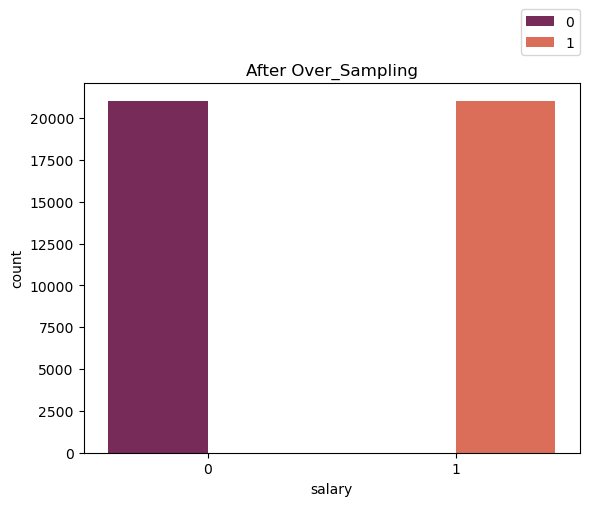

In [139]:
class_1_over=class_1.sample(21031,replace=True)
over_sampled=pd.concat([class_1_over,class_0],axis=0)
sns.countplot(over_sampled["salary"],palette="rocket",hue=over_sampled["salary"])
plt.legend(bbox_to_anchor=(1, 1.2), borderaxespad=0.)
plt.title("After Over_Sampling")
plt.show()

In [140]:
over_sampled

,age,marital-status,sex,hours-per-week,native-country,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
22467,0.424658,1,1,0.500000,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
26770,0.315068,1,0,0.397959,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
112,0.534247,1,0,0.500000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19567,0.410959,1,0,0.397959,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
22544,0.616438,1,0,0.448980,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,0.205479,1,0,0.397959,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
32552,0.356164,1,0,0.448980,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
32553,0.205479,0,0,0.102041,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
32555,0.068493,0,0,0.397959,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [141]:
x_over=pd.DataFrame(over_sampled.drop('salary',axis=1))
y_over=pd.DataFrame(over_sampled['salary'])
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.25, random_state=123,stratify=y_over)
X=np.concatenate((X_train,X_test))
y=np.concatenate((y_train,y_test))
from xgboost import XGBClassifier
xgb_over=XGBClassifier(random_state=0)
xgb_over.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [142]:
pred_over=xgb_over.predict(X_test)
confusion_matrix(y_test,pred_over)

array([[4154, 1104],
       [ 571, 4687]], dtype=int64)

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf_reg1 = RandomForestClassifier()

rf_reg1.fit(X_train,y_train)

y_pred_rf_over = rf_reg1.predict(X_test)

In [144]:
confusion_matrix(y_test,y_pred_rf_over)

array([[4389,  869],
       [ 235, 5023]], dtype=int64)

In [145]:
print("RF Accuracy",accuracy_score(y_test,y_pred_rf_over)*100)
print("RF Precision",precision_score(y_test,y_pred_rf_over)*100)
print("RF Recall",recall_score(y_test,y_pred_rf_over)*100)
print("RF F1_Score",f1_score(y_test,y_pred_rf_over)*100)

RF Accuracy 89.5017116774439
RF Precision 85.25118805159538
RF Recall 95.53062000760745
RF F1_Score 90.09865470852019


## Cross-Validation

### K-Fold

In [146]:
from sklearn.model_selection import KFold
kfold_validation=KFold(15)
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
score_K=cross_val_score(XGBClassifier(random_state=0),x_over,y_over,cv=kfold_validation)
print(score_K)
m=score_K.mean()
print("The avg accuracy score for XGBClassifier is:",(m)*100)

[0.87130125 0.87344029 0.86519258 0.87696148 0.85984308 0.87339515
 0.88338088 0.83024251 0.77068474 0.76569187 0.76034237 0.77211127
 0.7842368  0.77924394 0.77924394]
The avg accuracy score for XGBClassifier is: 82.30208097590828


In [147]:
score_K=cross_val_score(RandomForestClassifier(),x_over,y_over,cv=kfold_validation)
print(score_K)
m2=score_K.mean()
print("The avg accuracy score for RandomForestClassifier  is:",(m2)*100)

[0.96078431 0.9597148  0.96326676 0.95756063 0.95827389 0.96326676
 0.96718973 0.89300999 0.83380884 0.82168331 0.82382311 0.83024251
 0.84700428 0.84308131 0.84165478]
The avg accuracy score for RandomForestClassifier  is: 89.7624334305546


## StratifiedKFold

In [148]:
from sklearn.model_selection import StratifiedKFold
skfold_validation= StratifiedKFold(n_splits=15, shuffle=True, random_state=None)
score_K=cross_val_score(XGBClassifier(random_state=0),x_over,y_over,cv=skfold_validation)
print(score_K)
m=score_K.mean()
print("The avg accuracy score for XGBClassifier is:",(m)*100)

[0.8399287  0.83565062 0.84843081 0.83951498 0.83166904 0.83273894
 0.82703281 0.84094151 0.83701854 0.83915835 0.83987161 0.85057061
 0.83523538 0.85164051 0.85485021]
The avg accuracy score for XGBClassifier is: 84.02835097640836


In [149]:
score_K=cross_val_score(RandomForestClassifier(),x_over,y_over,cv=skfold_validation)
print(score_K)
m=score_K.mean()
print("The avg accuracy score for RandomForestClassifier is:",(m)*100)

[0.90980392 0.90730838 0.90406562 0.90477889 0.90192582 0.90513552
 0.90299572 0.91048502 0.90905849 0.89657632 0.89693295 0.90014265
 0.90691869 0.90977175 0.91333809]
The avg accuracy score for RandomForestClassifier is: 90.5282522294354


In [150]:
#### Here we can see Random Forest Classifier gave a accuracy score better than xgb classifer, when checked cross validation also only foud a minute overlap  

### Hyper parametric tunning.

In [151]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
classifier=RandomForestClassifier()
random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=15,verbose=3)
random_search.fit(X_train,y_train)

Fitting 15 folds for each of 5 candidates, totalling 75 fits


RandomizedSearchCV(cv=15, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'n_estimators': [25, 50, 100, 150]},
                   verbose=3)

In [152]:
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)


In [153]:
model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=6,
                                    n_estimators=25)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
model_grid.fit(X_train, y_train)
y_pred_grid = classifier.predict(X_test)
confusion_matrix(y_test,y_pred_grid)

array([[4396,  862],
       [ 226, 5032]], dtype=int64)

In [155]:
print("RF Accuracy",accuracy_score(y_test,y_pred_rf_over)*100)
print("RF Precision",precision_score(y_test,y_pred_rf_over)*100)
print("RF Recall",recall_score(y_test,y_pred_rf_over)*100)
print("RF F1_Score",f1_score(y_test,y_pred_rf_over)*100)

RF Accuracy 89.5017116774439
RF Precision 85.25118805159538
RF Recall 95.53062000760745
RF F1_Score 90.09865470852019


In [156]:
print("RF Accuracy",accuracy_score(y_test,y_pred_grid)*100)
print("RF Precision",precision_score(y_test,y_pred_grid)*100)
print("RF Recall",recall_score(y_test,y_pred_grid)*100)
print("RF F1_Score",f1_score(y_test,y_pred_grid)*100)

RF Accuracy 89.6538607835679
RF Precision 85.37495758398371
RF Recall 95.70178775199696
RF F1_Score 90.24390243902438


In [157]:

p=['age', 'marital-status', 'sex', 'hours-per-week', 'native-country',
        'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White']

In [158]:
X=pd.DataFrame(X,columns=p)
y=pd.DataFrame(y,columns=["salary"])

In [159]:
data2=RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=6,
                                    n_estimators=25)
data2.fit(X,y)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=6,
                       n_estimators=25)

In [160]:
prdicted_values=pd.DataFrame(y_test)
prdicted_values

,salary
31014,0
9306,1
4841,0
24159,0
8361,1
...,...
13470,0
11528,0
31235,1
19850,1


In [161]:

prdicted_values2=pd.DataFrame(y_pred_grid)
prdicted_values2

,0
0,0
1,1
2,0
3,0
4,1
...,...
10511,0
10512,0
10513,1
10514,1


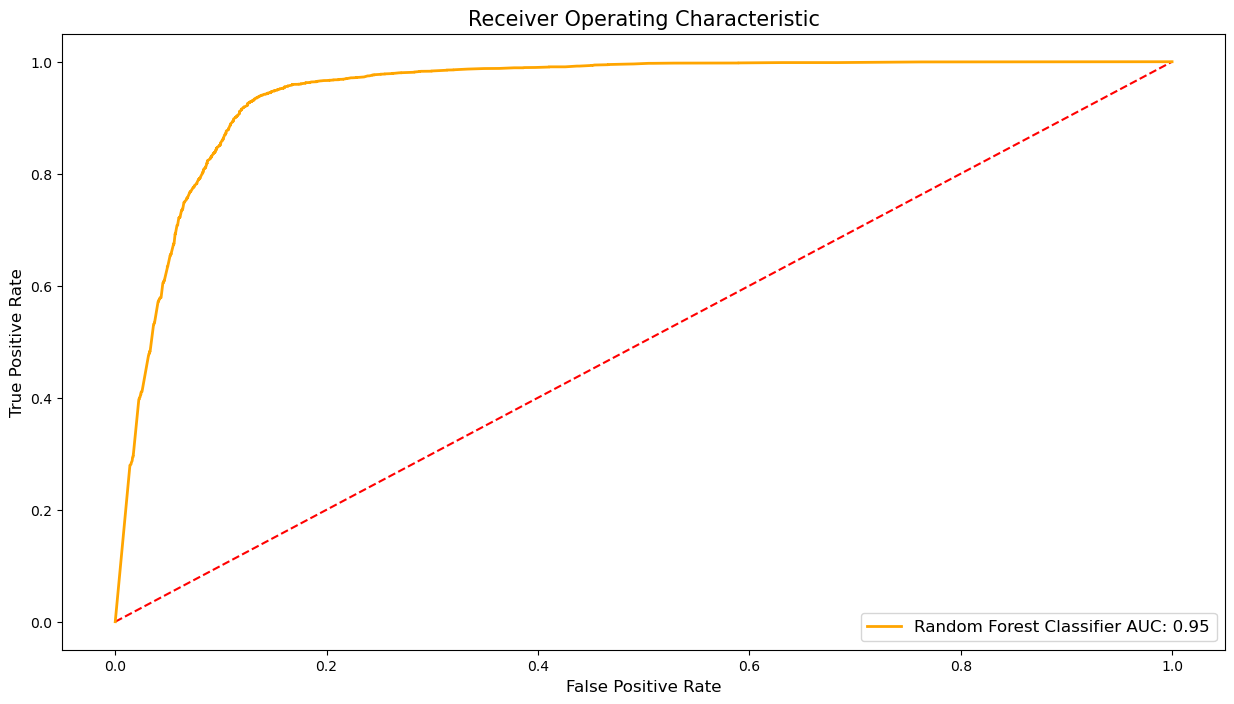

In [162]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (15, 8))
plt.plot([0,1], [0,1], 'r--')

probs = classifier.predict_proba(X_test)
# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'Random Forest Classifier' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'orange', label = label, linewidth = 2)
    
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Receiver Operating Characteristic', fontsize = 15)
plt.legend(loc = 'lower right',fontsize = 12)
plt.show()

In [163]:
####The area under the ROC curve represents the ability of our model to predict correct values, and the curve that we got is quite a good score.

In [164]:
import pickle
pickle.dump(data2,open("salary.pkl","wb"))

In [165]:
df

,age,marital-status,sex,hours-per-week,native-country,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.301370,0,0,0.397959,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.452055,1,0,0.122449,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.287671,0,0,0.397959,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0.493151,1,0,0.397959,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,1,1,0.397959,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,0.205479,0,0,0.102041,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
32554,0.493151,1,0,0.397959,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
32555,0.068493,0,0,0.397959,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
32556,0.136986,1,1,0.377551,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [166]:
z[z["salary"]== ">50K"]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
